# Exploratory Data Analysis (EDA)

This notebook loads the data and checks for missing values

In [1]:
import sys
sys.path.append('../src')
from data_preprocessing import load_csv_data, check_missing_values

In [2]:
# Load datasets
fraud_data = load_csv_data('../data/raw/Fraud_Data.csv')
ip_country = load_csv_data('../data/raw/IpAddress_to_Country.csv')

In [3]:
print('Missing values in Fraud_Data.csv:')
check_missing_values(fraud_data)

Missing values in Fraud_Data.csv:
Series([], dtype: int64)


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [4]:
print('Missing values in IpAddress_to_Country.csv:')
check_missing_values(ip_country)

Missing values in IpAddress_to_Country.csv:
Series([], dtype: int64)


lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [5]:
from data_preprocessing import remove_duplicates, correct_fraud_data_types, correct_ip_country_data_types

# Remove duplicates
fraud_data = remove_duplicates(fraud_data)
ip_country = remove_duplicates(ip_country)

# Correct data types
fraud_data = correct_fraud_data_types(fraud_data)
ip_country = correct_ip_country_data_types(ip_country)

In [6]:
# Quick inspection of cleaned data
print(fraud_data.info())
print(fraud_data.head())
print(fraud_data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  float64       
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 12.7+ MB
None
   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 0

Univerate Analysis

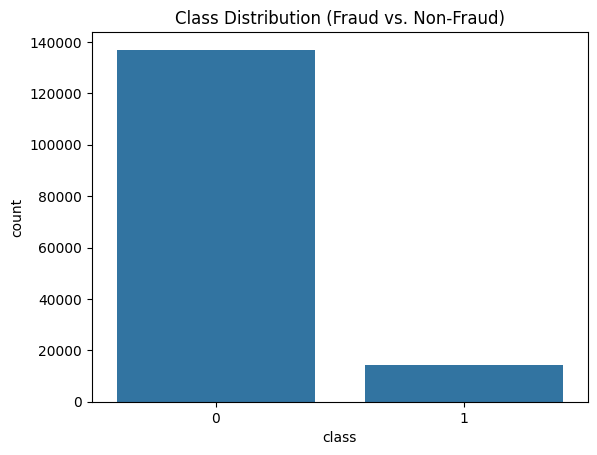

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='class', data=fraud_data)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.show()

print(fraud_data['class'].value_counts(normalize=True))

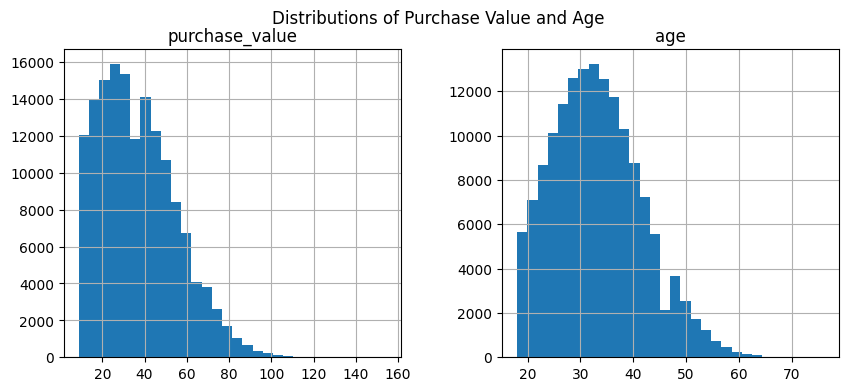

In [8]:
#Numeric Feature Distribution 
fraud_data[['purchase_value', 'age']].hist(bins=30, figsize=(10, 4))
plt.suptitle('Distributions of Purchase Value and Age')
plt.show()

In [9]:
for col in ['source', 'browser', 'sex']:
    print(fraud_data[col].value_counts())
    print('-' * 45)

source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64
---------------------------------------------
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64
---------------------------------------------
sex
M    88293
F    62819
Name: count, dtype: int64
---------------------------------------------


Bivariative Analysis

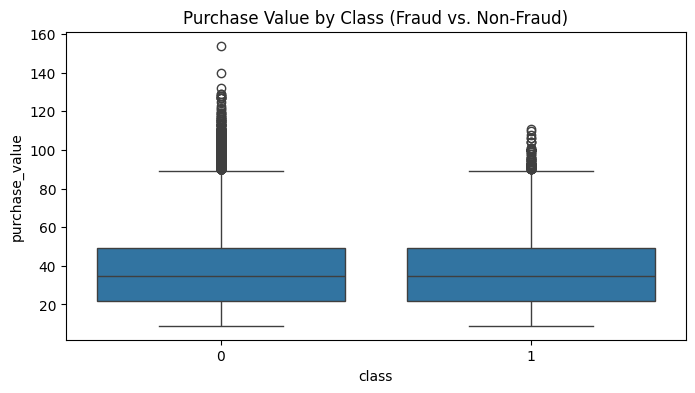

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value by Class (Fraud vs. Non-Fraud)')
plt.show()

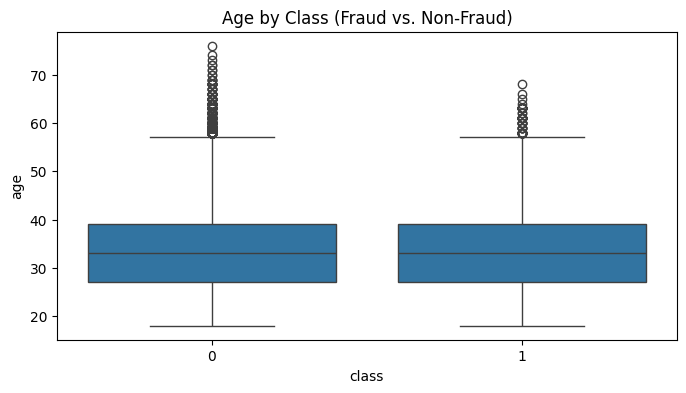

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='class', y='age', data=fraud_data)
plt.title('Age by Class (Fraud vs. Non-Fraud)')
plt.show()

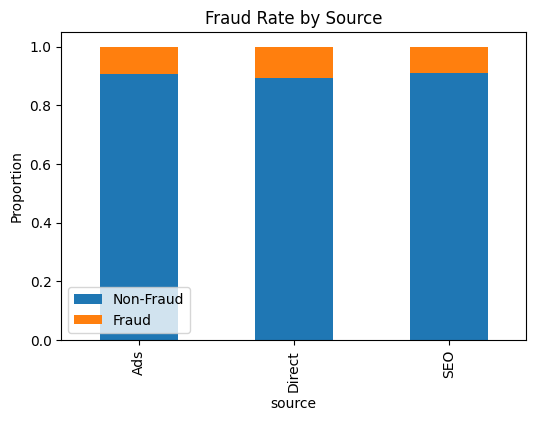

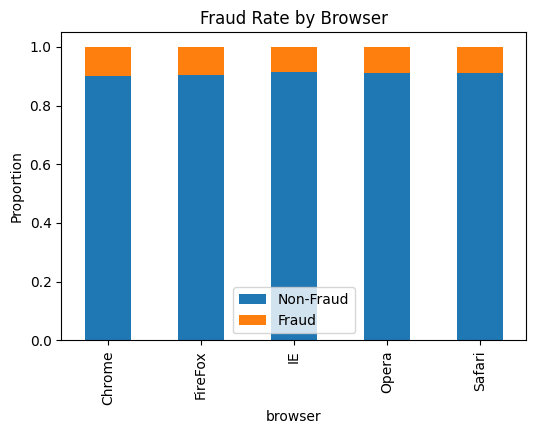

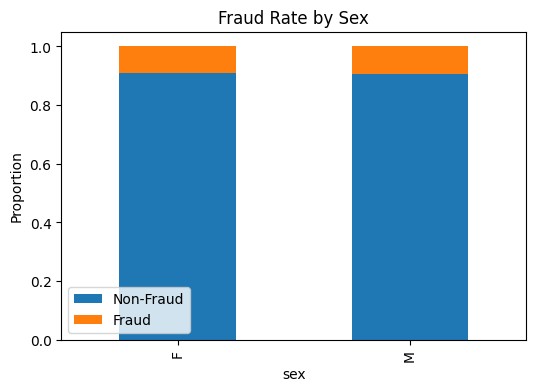

In [12]:
import pandas as pd
for col in ['source', 'browser', 'sex']:
    ctab = pd.crosstab(fraud_data[col], fraud_data['class'], normalize='index')
    ctab.plot(kind='bar', stacked=True, figsize=(6, 4))
    plt.title(f'Fraud Rate by {col.capitalize()}')
    plt.ylabel('Proportion')
    plt.legend(['Non-Fraud', 'Fraud'])
    plt.show()

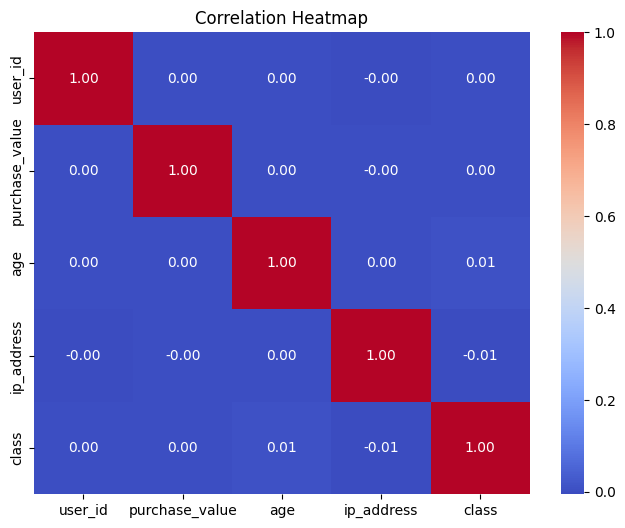

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = fraud_data.select_dtypes(include=['number', 'datetime64[ns]'])
numeric_cols = fraud_data.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from feature_engineering import add_time_features, add_transaction_frequency

  # Add time-based features
fraud_data = add_time_features(fraud_data)

  # Add transaction frequency and velocity features
fraud_data = add_transaction_frequency(fraud_data)

In [15]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,time_since_signup,user_transaction_count,device_transaction_count,user_transaction_velocity
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,2,5,1251.856111,1,1,1.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,0,4.984444,1,1,1.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,18,3,0.000278,1,12,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,13,0,136.690278,1,1,1.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,18,2,1211.516944,1,1,1.0


In [16]:
import numpy as np

for col in ['lower_bound_ip_address', 'upper_bound_ip_address']:
    ip_country[col] = ip_country[col].astype(str).str.replace('.0', '', regex=False)
    ip_country[col] = ip_country[col].astype(np.int64)

In [17]:
import numpy as np

# Ensure ip_address_int exists and is of integer type
fraud_data['ip_address_int'] = fraud_data['ip_address'].astype(np.int64)

In [18]:
from feature_engineering import merge_with_country

fraud_data = merge_with_country(fraud_data, ip_country)

In [19]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,time_since_signup,user_transaction_count,device_transaction_count,user_transaction_velocity,ip_address_int,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,2,5,1251.856111,1,1,1.0,732758368,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,0,4.984444,1,1,1.0,350311387,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,18,3,0.000278,1,12,1.0,2621473820,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,13,0,136.690278,1,1,1.0,3840542443,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,18,2,1211.516944,1,1,1.0,415583117,United States


In [20]:
print(fraud_data['class'].value_counts())
print(fraud_data['class'].value_counts(normalize=True))

class
0    136961
1     14151
Name: count, dtype: int64
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [21]:
#preparing features and target
X = fraud_data.drop(['class', 'signup_time', 'purchase_time'], axis=1)
y = fraud_data['class']

In [22]:
#spliting into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
#dropping high cardinality columns and one-hot encoding catagorical dolumns
from sklearn.model_selection import train_test_split

X = fraud_data.drop(['class', 'signup_time', 'purchase_time'], axis=1)
y = fraud_data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [24]:
# Columns to exclude from one-hot encoding due to high cardinality
high_cardinality = ['user_id', 'device_id']

# Categorical columns to one-hot encode
categorical_cols = ['source', 'browser', 'sex', 'country']

# Drop high-cardinality columns from features
X_train_reduced = X_train.drop(columns=high_cardinality)
X_test_reduced = X_test.drop(columns=high_cardinality)

# One-hot encode only the selected categorical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train_reduced[categorical_cols])
X_test_encoded = encoder.transform(X_test_reduced[categorical_cols])

import pandas as pd

# Numeric columns (all others after dropping high-cardinality and categorical)
X_train_num = X_train_reduced.drop(columns=categorical_cols).reset_index(drop=True)
X_test_num = X_test_reduced.drop(columns=categorical_cols).reset_index(drop=True)

# Combine numeric and encoded categorical features
X_train_prepared = pd.concat(
    [X_train_num, pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))],
    axis=1
)
X_test_prepared = pd.concat(
    [X_test_num, pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))],
    axis=1
)

In [25]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_prepared, y_train.reset_index(drop=True))

# Check the new class distribution
print(y_train_res.value_counts())
print(y_train_res.value_counts(normalize=True))

class
0    109568
1    109568
Name: count, dtype: int64
class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [27]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (exclude one-hot encoded columns)
numeric_cols = [
    'purchase_value', 'age', 'ip_address', 'hour_of_day', 'day_of_week',
    'time_since_signup', 'user_transaction_count', 'device_transaction_count',
    'user_transaction_velocity', 'ip_address_int'
]

scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_res_scaled = X_train_res.copy()
X_test_prepared_scaled = X_test_prepared.copy()

X_train_res_scaled[numeric_cols] = scaler.fit_transform(X_train_res[numeric_cols])
X_test_prepared_scaled[numeric_cols] = scaler.transform(X_test_prepared[numeric_cols])

In [33]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
X_train_final = selector.fit_transform(X_train_res_scaled)
X_test_final = selector.transform(X_test_prepared_scaled)

kept_columns = X_train_res_scaled.columns[selector.get_support()]
print("Kept columns:", kept_columns.tolist())

Kept columns: ['purchase_value', 'age', 'ip_address', 'hour_of_day', 'day_of_week', 'time_since_signup', 'device_transaction_count', 'ip_address_int', 'source_Ads', 'source_Direct', 'source_SEO', 'browser_Chrome', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'sex_F', 'sex_M', 'country_Afghanistan', 'country_Albania', 'country_Algeria', 'country_Angola', 'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahamas', 'country_Bahrain', 'country_Bangladesh', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Belize', 'country_Benin', 'country_Bermuda', 'country_Bhutan', 'country_Bolivia', 'country_Bosnia and Herzegowina', 'country_Botswana', 'country_Brazil', 'country_British Indian Ocean Territory', 'country_Brunei Darussalam', 'country_Bulgaria', 'country_Burkina Faso', 'country_Burundi', 'country_Cambodia', 'country_Cameroon', 'country_Canada', 'country_Cape V

In [36]:
# Check summary statistics for scaled numeric features
numeric_cols=kept_columns
print(X_train_res_scaled[numeric_cols].describe())

       purchase_value           age    ip_address   hour_of_day   day_of_week  \
count    2.191360e+05  2.191360e+05  2.191360e+05  2.191360e+05  2.191360e+05   
mean    -9.986819e-17 -3.837792e-16  1.862477e-16  3.839089e-17  5.187958e-17   
std      1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min     -1.581704e+00 -1.818288e+00 -1.725262e+00 -1.732561e+00 -1.524696e+00   
25%     -7.901033e-01 -7.357274e-01 -8.472961e-01 -8.243192e-01 -1.012155e+00   
50%     -1.115885e-01 -1.402010e-02  7.329143e-03 -6.745073e-02  1.292720e-02   
75%      6.484796e-01  7.076872e-01  8.690943e-01  8.407914e-01  1.038009e+00   
max      6.617016e+00  5.158215e+00  1.734463e+00  1.749034e+00  1.550550e+00   

       time_since_signup  device_transaction_count  ip_address_int  \
count       2.191360e+05              2.191360e+05    2.191360e+05   
mean        9.960879e-17              6.640586e-17   -8.663890e-17   
std         1.000002e+00              1.000002e+00    1.0000

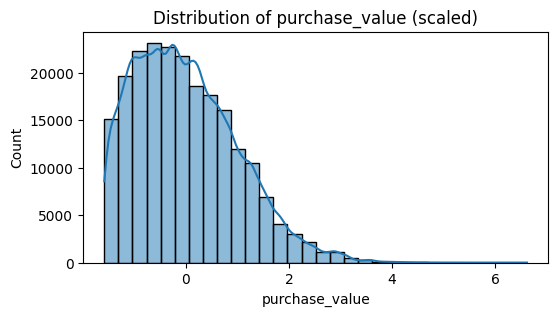

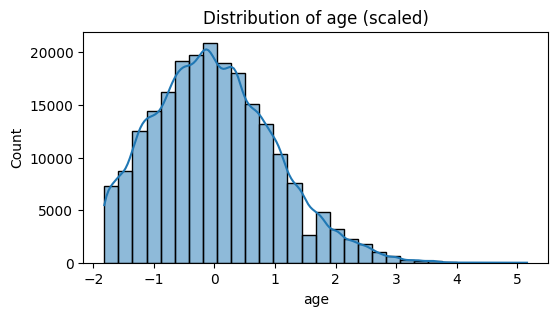

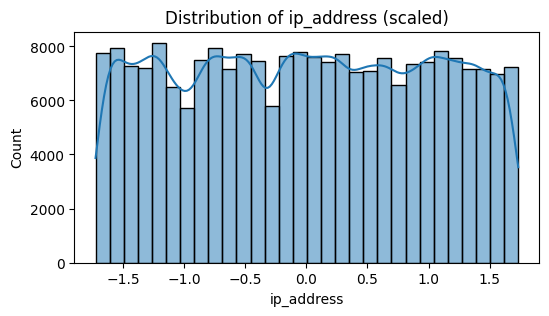

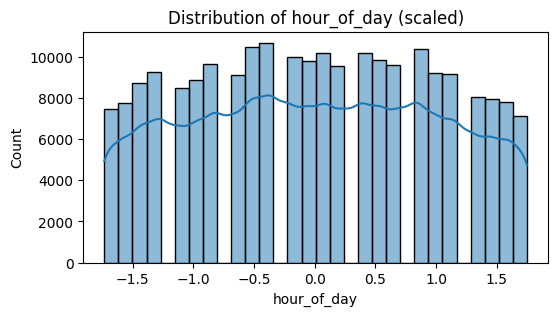

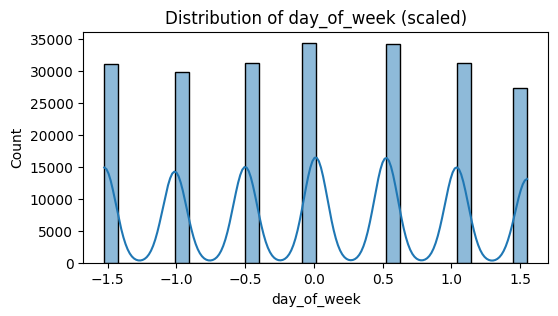

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histograms for a few scaled features
for col in kept_columns[:5]:  # Show first 5 for brevity
    plt.figure(figsize=(6, 3))
    sns.histplot(X_train_res_scaled[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} (scaled)')
    plt.show()